# NLP using Word Vectors

In [1]:
import numpy as np
import pandas as pd

### Regular word encoding (one-hot-encodding & word-count-vectorisation)

In [2]:
from sklearn.feature_extraction.text import CountVectorizer 

In [3]:
text = ['The cat sat on the car',
       'the data is on the boat',
       'why is my cat on the boat']

In [4]:
encoder = CountVectorizer()
encoder.fit(text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [5]:
word_count_data = encoder.transform(text).todense()
word_count_data

matrix([[0, 1, 1, 0, 0, 0, 1, 1, 2, 0],
        [1, 0, 0, 1, 1, 0, 1, 0, 2, 0],
        [1, 0, 1, 0, 1, 1, 1, 0, 1, 1]])

In [39]:
word_labels = encoder.get_feature_names()
word_labels

['boat', 'car', 'cat', 'data', 'is', 'my', 'on', 'sat', 'the', 'why']

In [7]:
word_count_df = pd.DataFrame(word_count_data, columns = word_labels)
word_count_df

,boat,car,cat,data,is,my,on,sat,the,why
0,0,1,1,0,0,0,1,1,2,0
1,1,0,0,1,1,0,1,0,2,0
2,1,0,1,0,1,1,1,0,1,1


### What are word vectors

In [8]:
import spacy

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
nlp = spacy.load('en_core_web_md')

### How to use word vectors for comparing word similarity

In [40]:
word_vectors = []
# word_labels = ['cat','dog','boat','car', 'bike', 'scooter']
for word in word_labels:
    word_vector = nlp(word).vector
    word_vectors.append(word_vector)
word_vectors = np.array(word_vectors)

In [41]:
pca = PCA(n_components=2)
pca.fit(word_vectors)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [42]:
word_vectors_2 = pca.transform(word_vectors)

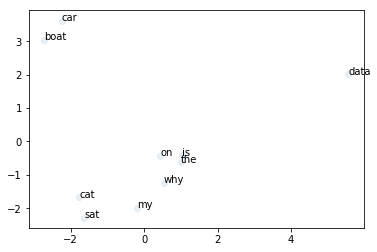

In [43]:
plt.scatter(x=word_vectors_2[:,0], 
            y=word_vectors_2[:,1], 
            alpha=0.1)

for word, x_y in zip(word_labels, word_vectors_2):
    x, y = x_y
    plt.text(x, y, word)
plt.show()

### How to get a simple document vector

### Improve document vector through stop word removal

### One-hot-encodding VS word vectors in predicting food labeling 